In [1]:
#import data manupulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import logging libraries
import logging
logging.basicConfig(level=logging.INFO,
                    filemode='w',
                    filename='logfile.log',
                    format='%(asctime)s - %(levelname)s - %(message)s',force=True)

In [2]:
#Data import 
url='https://raw.githubusercontent.com/Saimehtre18/Heart_Failure_Prediction/refs/heads/main/heart.csv'
df=pd.read_csv(url)
df.sample(frac=1)
print(df.sample(frac=1))

     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
132   56   M           ASY        170          388          0         ST   
117   59   F           ASY        130          338          1         ST   
481   69   M           NAP        140            0          1         ST   
801   56   M           ASY        132          184          0        LVH   
458   61   M           ASY        134            0          1         ST   
..   ...  ..           ...        ...          ...        ...        ...   
621   56   M           NAP        130          256          1        LVH   
79    49   M           ASY        130          206          0     Normal   
114   49   F           NAP        130          207          0         ST   
76    32   M           ASY        118          529          0     Normal   
900   58   M           ASY        114          318          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
132    122              Y  

In [3]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [4]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [5]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [7]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])
df['Sex']=le.fit_transform(df['Sex'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


In [11]:
Numerical_Data=df.select_dtypes(include=['int64','float64'])
Numerical_Data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0
...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1
914,68,144,193,1,141,3.4,1
915,57,130,131,0,115,1.2,1
916,57,130,236,0,174,0.0,1


In [12]:
from collections import OrderedDict

stats = []

# Descriptive statistics
for col in df.columns:
    if df[col].dtype != 'object':
        numerical_stats = OrderedDict({
            'Feature': col,
            'Minimum': df[col].min(),
            'Maximum': df[col].max(),
            'Mean': df[col].mean(),
            'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
            '25%': df[col].quantile(0.25),
            '75%': df[col].quantile(0.75),
            'IQR': df[col].quantile(0.75) - df[col].quantile(0.25),
            'Standard Deviation': df[col].std(),
            'Skewness': df[col].skew(),
            'Kurtosis': df[col].kurt()
        })
        stats.append(numerical_stats)

# Convert to DataFrame
report = pd.DataFrame(stats)

# Outlier Identification :
outlier_label = []
for col in report['Feature']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = df[(df[col] < LW) | (df[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

# Checking Report
report

,Feature,Minimum,Maximum,Mean,Mode,25%,75%,IQR,Standard Deviation,Skewness,Kurtosis,Outlier Comment
0,Age,28.0,77.0,53.510893,54.0,47.00,60.0,13.00,9.432617,-0.195933,-0.386140,No Outliers
1,Sex,0.0,1.0,0.789760,1.0,1.00,1.0,0.00,0.407701,-1.424540,0.029372,Has Outliers
2,ChestPainType,0.0,3.0,0.781046,0.0,0.00,2.0,2.00,0.956519,0.793916,-0.717257,No Outliers
3,RestingBP,0.0,200.0,132.396514,120.0,120.00,140.0,20.00,18.514154,0.179839,3.271251,Has Outliers
4,Cholesterol,0.0,603.0,198.799564,0.0,173.25,267.0,93.75,109.384145,-0.610086,0.118208,Has Outliers
5,FastingBS,0.0,1.0,0.233115,0.0,0.00,0.0,0.00,0.423046,1.264484,-0.401960,Has Outliers
6,RestingECG,0.0,2.0,0.989107,1.0,1.00,1.0,0.00,0.631671,0.008492,-0.487634,Has Outliers
7,MaxHR,60.0,202.0,136.809368,150.0,120.00,156.0,36.00,25.460334,-0.144359,-0.448248,Has Outliers
8,ExerciseAngina,0.0,1.0,0.404139,0.0,0.00,1.0,1.00,0.490992,0.391329,-1.850898,No Outliers
9,Oldpeak,-2.6,6.2,0.887364,0.0,0.00,1.5,1.50,1.066570,1.022872,1.203064,Has Outliers


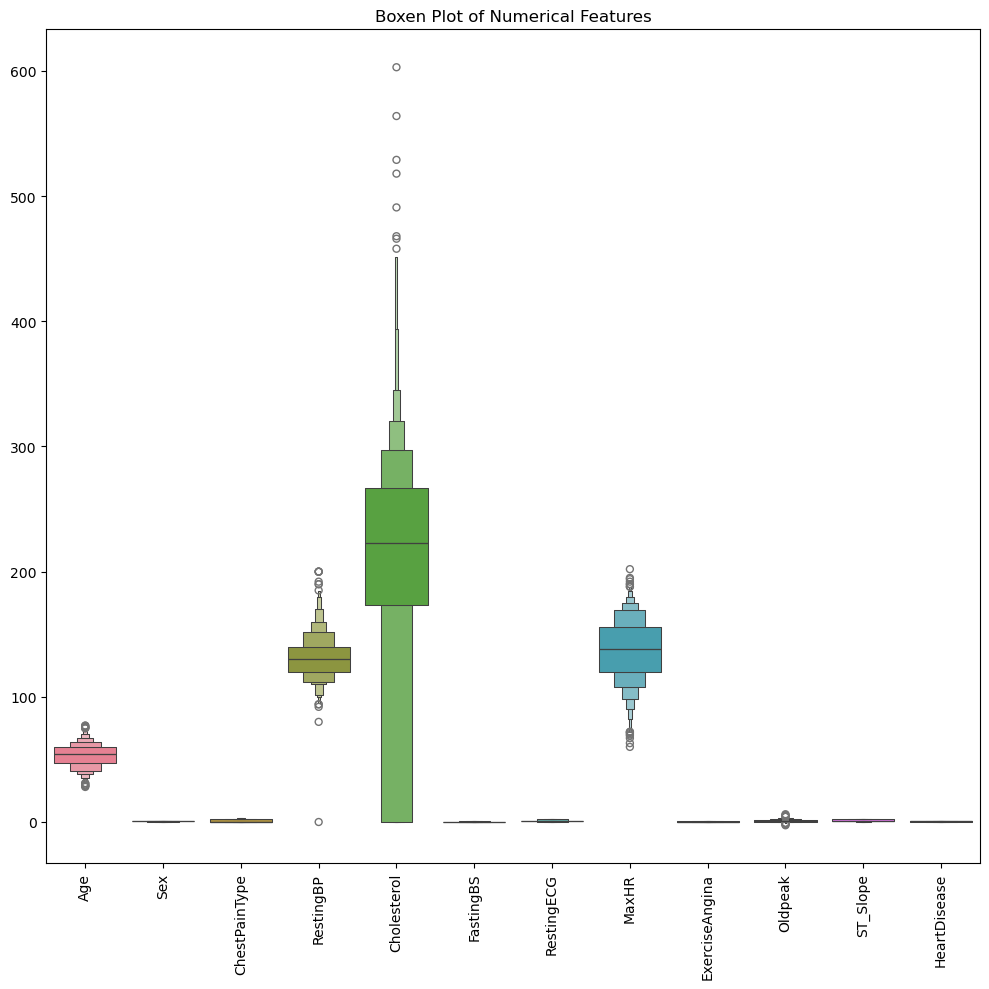

In [13]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 10))
sns.boxenplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()

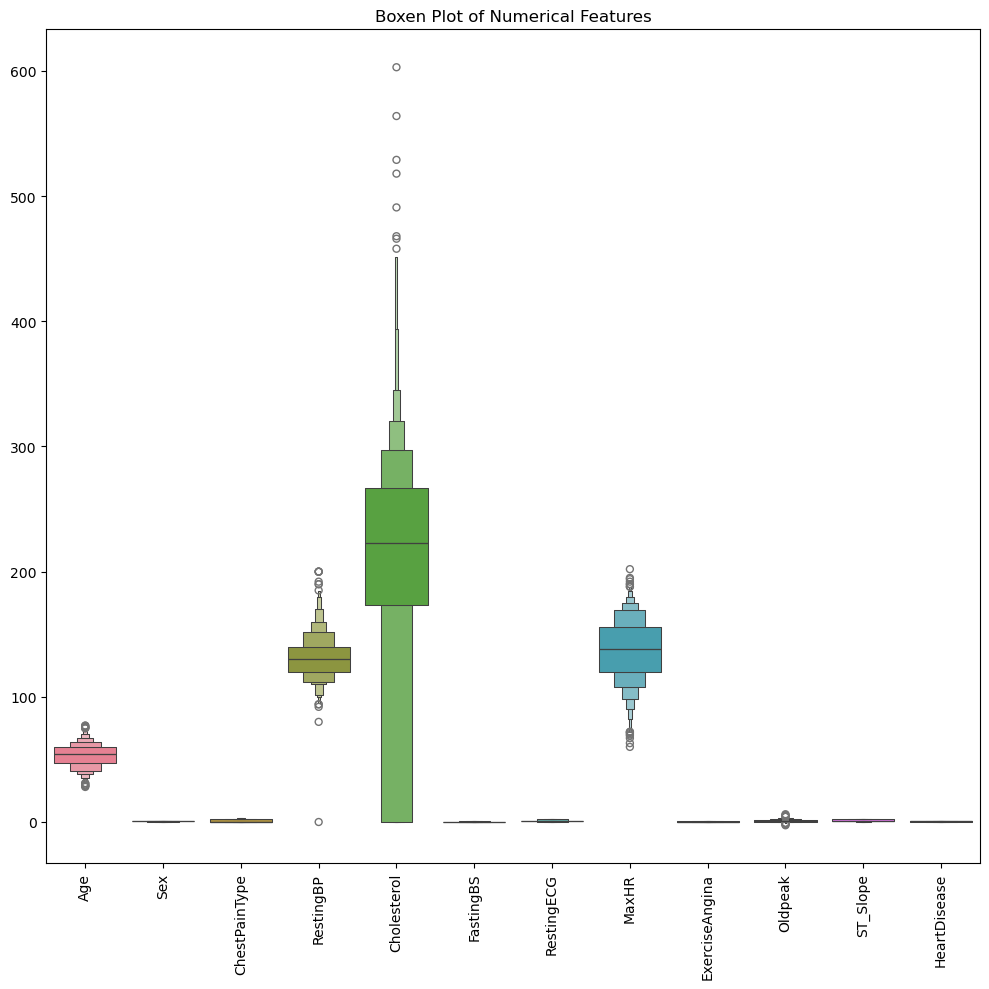

No outliers found in 'Age'.
Replaced 193 outliers in 'Sex' with median.
No outliers found in 'ChestPainType'.
Replaced 28 outliers in 'RestingBP' with median.
Replaced 183 outliers in 'Cholesterol' with median.
Replaced 214 outliers in 'FastingBS' with median.
Replaced 366 outliers in 'RestingECG' with median.
Replaced 2 outliers in 'MaxHR' with median.
No outliers found in 'ExerciseAngina'.
Replaced 16 outliers in 'Oldpeak' with median.
No outliers found in 'ST_Slope'.
No outliers found in 'HeartDisease'.


In [14]:
# Checking BoxenPlot 
plt.figure(figsize=(10, 10))
sns.boxenplot(data= df)

plt.xticks(rotation = 90)  
plt.title("Boxen Plot of Numerical Features")
plt.tight_layout()
plt.show()
# Replace Outliers with Median Statergy

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    outlier_count = outliers.sum()

    if outlier_count > 0:
        replacement = df[col].median()  
        df.loc[outliers, col] = replacement
        print(f"Replaced {outlier_count} outliers in '{col}' with median.")
    else:
        print(f"No outliers found in '{col}'.")

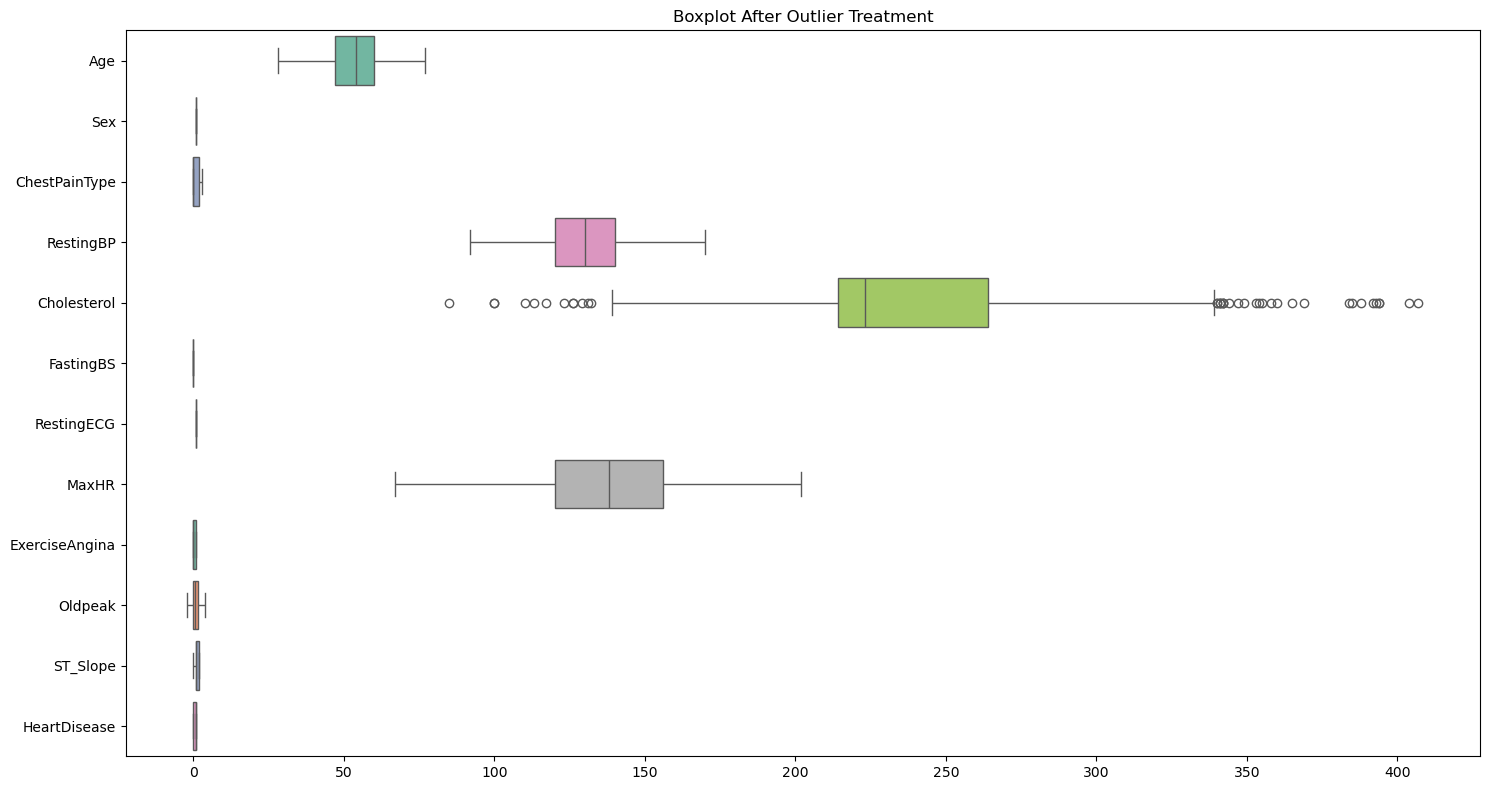

In [15]:
# Set figure size
plt.figure(figsize=(15, 8))

# Create boxplot for all numerical columns
sns.boxplot(data=df, orient='h', palette='Set2')

# Set title
plt.title('Boxplot After Outlier Treatment')
plt.tight_layout()
plt.show()

In [16]:
X=df.drop(columns=['HeartDisease'])
y=df['HeartDisease']

In [17]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [18]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [20]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of RandomForestClassifier: ",accuracy_score_LR)
print("Confusion Matrix of RandomForestClassifier: \n",confusion_matrix_LR)

Accuracy of RandomForestClassifier:  0.8369565217391305
Confusion Matrix of RandomForestClassifier: 
 [[71  6]
 [24 83]]


In [22]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of DecisionTreeClassifier: ",accuracy_score_LR)
print("Confusion Matrix of DecisionTreeClassifier: \n",confusion_matrix_LR)

Accuracy of DecisionTreeClassifier:  0.7554347826086957
Confusion Matrix of DecisionTreeClassifier: 
 [[63 14]
 [31 76]]


In [24]:
from xgboost import XGBClassifier
XB=XGBClassifier()
XB.fit(X_train,y_train)
y_pred=XB.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score_LR=accuracy_score(y_test,y_pred)
confusion_matrix_LR=confusion_matrix(y_test,y_pred)
print("Accuracy of XGBClassifier: ",accuracy_score_LR)
print("Confusion Matrix of XGBClassifier: \n",confusion_matrix_LR)

Accuracy of XGBClassifier:  0.7989130434782609
Confusion Matrix of XGBClassifier: 
 [[66 11]
 [26 81]]
